<a href="https://colab.research.google.com/github/Yomunozs/Aprendizaje_Maquina/blob/main/1_Probabildades_Bayes/Ejm_Descomposicion_26_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
x = faces.images

In [ ]:
x.shape

(400, 64, 64)

(400, 64, 64)


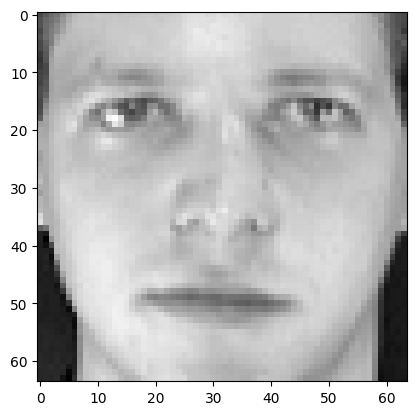

In [ ]:
import matplotlib.pyplot as plt

print(x.shape)
plt.imshow(x[0], cmap = "gray")
plt.show()
x = x.reshape(x.shape[0], -1)# Vuelve el vector en columna (matriz x) y con .shape pregunta de cuanto quedo

In [ ]:
import numpy as np

U, S ,Vh = np.linalg.svd(x) #Descomposicion por valores singulares
print(U.shape, S.shape, Vh.shape) #Vh tiene la informacion de las caras

(400, 400) (400,) (4096, 4096)


In [ ]:
xe = U.dot(np.diag(S).dot(Vh[:S.shape[0]])) #.dot = operacion matricial o se puede usar @
print(xe.shape)

(400, 4096)


In [ ]:
error = np.linalg.norm(x-xe,ord = "fro") #Norma para obtener el error norma de frobenius
print(error)

0.00026075222


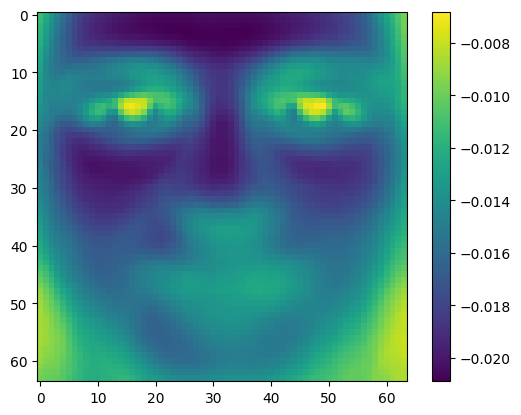

In [ ]:
plt.imshow(Vh[0].reshape(64,64)) # bases de "fourier", el valor mayor de los valores propios tiene mas informacion
plt.colorbar()
plt.show()

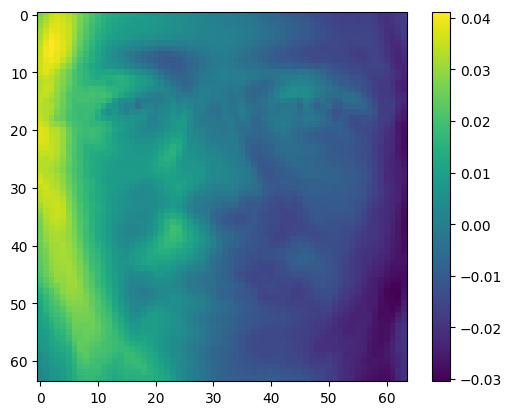

In [ ]:
plt.imshow(Vh[1].reshape(64,64)) # bases de "fourier"
plt.colorbar()
plt.show()

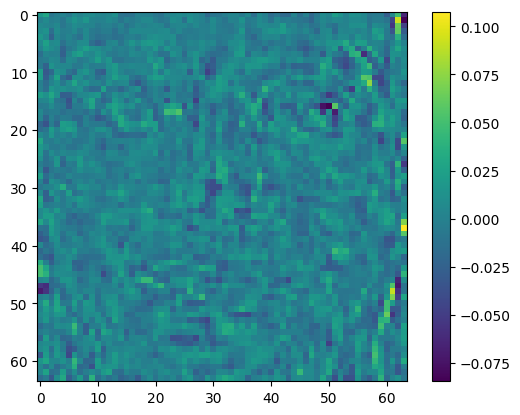

In [ ]:
plt.imshow(Vh[399].reshape(64,64)) # bases de "fourier"
plt.colorbar()
plt.show()

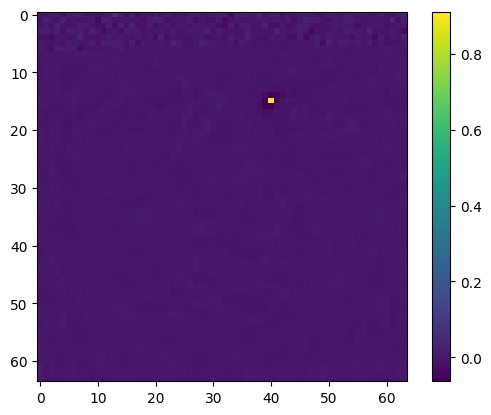

In [ ]:
plt.imshow(Vh[1000].reshape(64,64)) # bases de "fourier",
plt.colorbar()
plt.show()
# como ya no hay valores singulares, mayor a el rango todo es cero, el punto amarillo es ruido

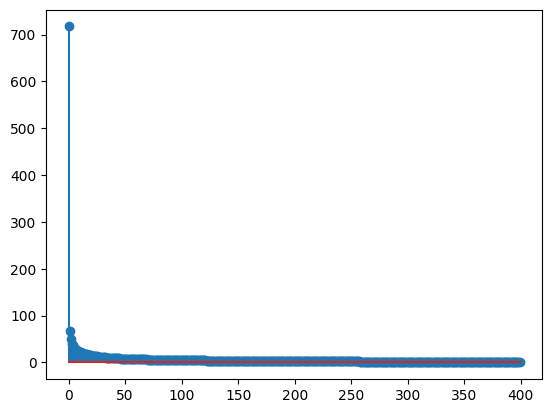

In [ ]:
#S = valores singulares
plt.stem(S) # Para identificar información de eigenvalores
plt.show()

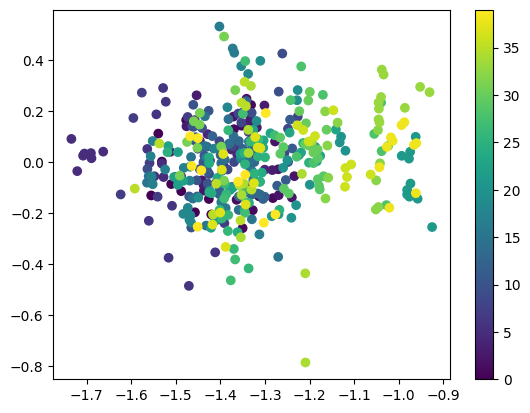

In [ ]:
A = U.dot(np.diag(S**0.5)) #u*S^1/2
plt.scatter(A[:,0],A[:,30], c = faces.target) #U son los enbebidos de las caras
plt.colorbar()
plt.show()

In [ ]:
#Para sacar la inversa de X, se quitan los valores insignificantes, y se deja la matriz que solo tiene la informacion
Vhm = Vh[:S.shape[0]]
iXTX = Vhm.T.dot(np.diag(S**2)).dot(Vhm)
iXTX.shape

(4096, 4096)

In [ ]:
W = iXTX.dot(x.T.DOT)